**los pasos a seguir en estos estadisticos son;

1.Hacer la lectura de datos de excel a python

2. Crear de la base de datos una subbase, correspndiente a la zona de  Europa (produccion y consumo de energía)

3. Con esta nueva base de datos vamos a crear los estadisticos correspondientes;

A. un grafico de lineas para el consumo de las principales energias renovables y un grafico de lineas para la produccion de las principales energías renovables

B. un grafico de torta desplazada para el año de 1965 (inicio de los registros), y un grafico de torta desplazada para el año 2021(final de los registros) con su correspondiente interpretación

c. un grafico de áreas apiladas para el consumo de las principales fuentes de energía renovable

d. un diagrama de la correlación lineal que pueda existir entre la principal fuente de energía y su paso del tiempo**

In [27]:
import matplotlib.pyplot as plt
import pandas as pd

datos1 = pd.read_csv("consumo_energia_ren.csv")
datos2 = pd.read_csv("produccion_energia_ren.csv")


datos1


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
0,Africa,NaN,1965,NaN,NaN,0.0000,13.905635
1,Africa,NaN,1966,NaN,NaN,0.0000,15.510005
2,Africa,NaN,1967,NaN,NaN,0.0000,16.190636
3,Africa,NaN,1968,NaN,NaN,0.0000,18.938341
4,Africa,NaN,1969,NaN,NaN,0.0000,22.100891
...,...,...,...,...,...,...,...
5605,World,OWID_WRL,2017,596.42050,445.46628,1140.3931,4069.982700
5606,World,OWID_WRL,2018,643.03204,576.23090,1269.9792,4183.166500
5607,World,OWID_WRL,2019,674.74536,703.94977,1420.5441,4231.377000
5608,World,OWID_WRL,2020,703.91644,846.22940,1596.4282,4345.990000


Solo queremos de la base de datos. la información correspondiente a Europa

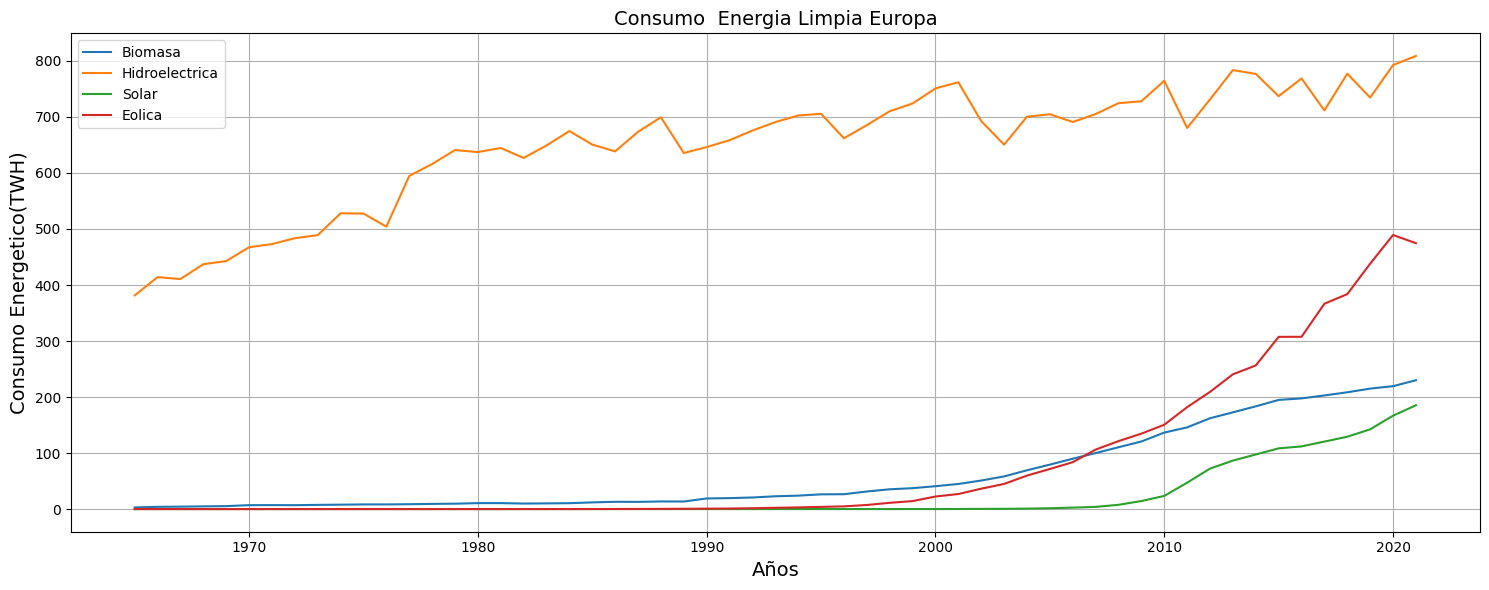

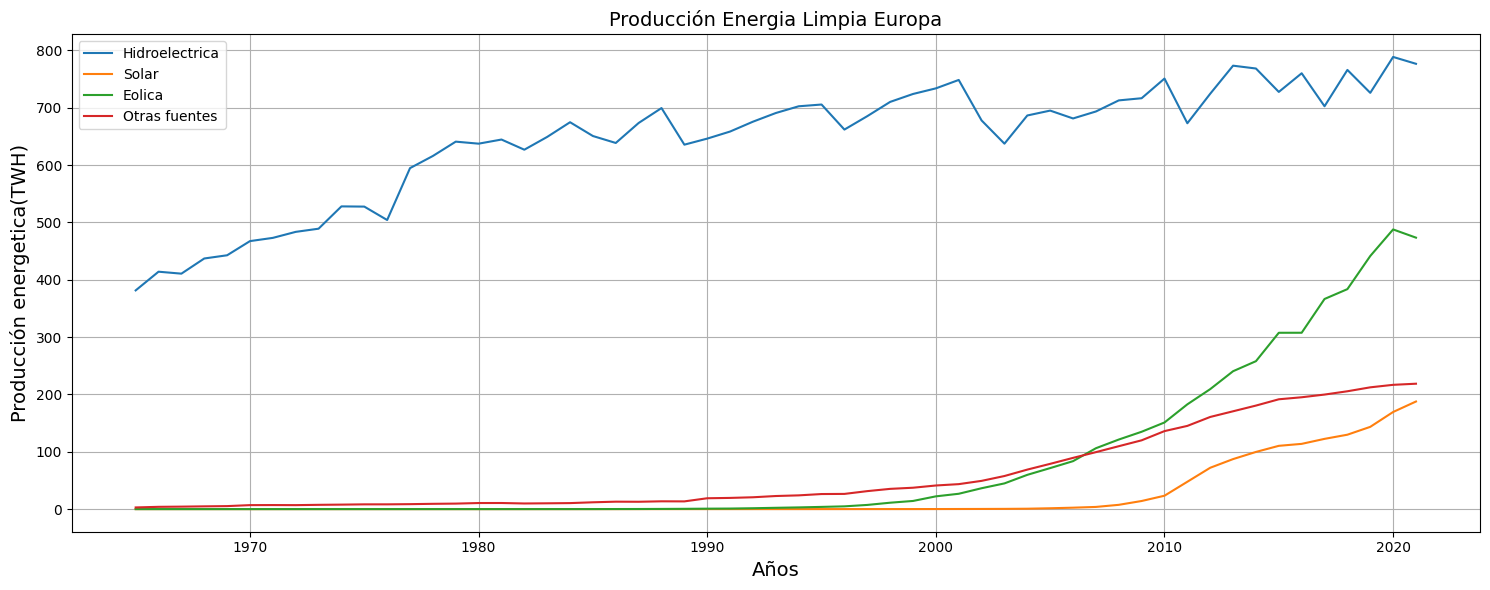

In [32]:
import matplotlib.pyplot as plt
import pandas as pd

datos1 = pd.read_csv("consumo_energia_ren.csv")


#Seleccion de datos unicamente de la zona europa
Europa1 = datos1[datos1['Entity'] == 'Europe']

#Estos datos pertenecen al consumo de energía de la zona llamada Europa 

años = Europa1['Year']
energia1 = Europa1['Geo Biomass Other - TWh']
energia2 = Europa1['Hydro Generation - TWh']
energia3 = Europa1['Solar Generation - TWh']
energia4 = Europa1['Wind Generation - TWh']


#vamos a hacer el gráfico de lineas
plt.figure(figsize=(15,6))
plt.plot(años,energia1, label='Biomasa')
plt.plot(años,energia2, label='Hidroelectrica')
plt.plot(años,energia3, label='Solar')
plt.plot(años,energia4, label='Eolica')


#Añadir etiquetas y titulos
plt.title('Consumo  Energia Limpia Europa',fontsize=14)
plt.xlabel('Años',fontsize=14)
plt.ylabel( 'Consumo Energetico(TWH)',fontsize=14)

#Mostrar leyenda
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('consumo_Europa')
plt.show()

###########################################################################

datos2 = pd.read_csv("produccion_energia_ren.csv")


#Seleccion de datos unicamente de la zona europa
Europa2 = datos2[datos2['Entity'] == 'Europe']

#Estos datos pertenecen a la producción  de Energía de la zona llamada Europa 

años = Europa2['Year']
energia5 = Europa2['Electricity from hydro (TWh)']
energia6 = Europa2['Electricity from solar (TWh)']
energia7 = Europa2['Electricity from wind (TWh)']
energia8 = Europa2['Other renewables including bioenergy (TWh)']


#vamos a hacer el gráfico de lineas
plt.figure(figsize=(15,6))
plt.plot(años,energia5, label='Hidroelectrica')
plt.plot(años,energia6, label='Solar')
plt.plot(años,energia7, label='Eolica')
plt.plot(años,energia8, label='Otras fuentes')


#Añadir etiquetas y titulos
plt.title('Producción Energia Limpia Europa',fontsize=14)
plt.xlabel('Años',fontsize=14)
plt.ylabel( 'Producción energetica(TWH)',fontsize=14)

#Mostrar leyenda
plt.legend()

plt.grid(True)
plt.tight_layout()
plt.savefig('produccion_Europa')
plt.show()

2. Diagrama de torta desplazada de los años 1965 y 2021 respectivamente

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

#Este es el consumo de energía renovable en Africa en 1965
Europa1965 = Europa1[Europa1['Year'] == 1965]

#print(Africa1965) 

estEuropa1965 = pd.DataFrame(Europa1965)

estEuropa1965


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
1505,Europe,NaN,1965,2.909,0.0,0.0,381.45035


In [19]:
Europa2021 = Europa1[Europa1['Year'] == 2021]



estEuropa2021 = pd.DataFrame(Europa2021)

estEuropa2021


,Entity,Code,Year,Geo Biomass Other - TWh,Solar Generation - TWh,Wind Generation - TWh,Hydro Generation - TWh
1561,Europe,NaN,2021,229.99367,185.31532,474.65585,808.83356


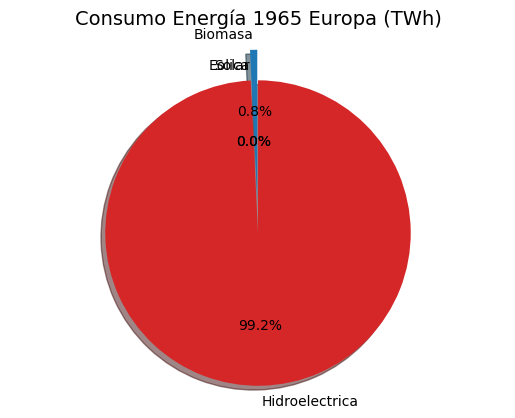

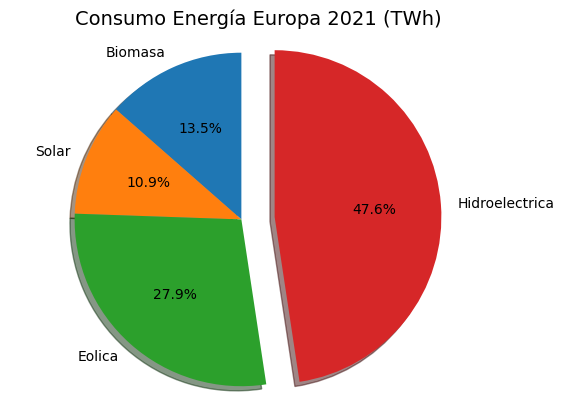

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

#Este es el consumo de energía renovable en Europa 1965
Europa1965 = Europa1[Europa1['Year'] == 1965]


estEuropa1965 = pd.DataFrame(Europa1965)

estEuropa1965

#Despues de calcular los estadisticos y tener los datos. Hacemos un diaggrama de torta desplazado

tipo_ee_1965 = ['Biomasa','Solar','Eolica','Hidroelectrica']
consumos_ee_1965 =[2.909, 0.0, 0.0,	381.45035]

fig,ax = plt.subplots()
explode = (0.2,0,0,0)

ax.pie(consumos_ee_1965,labels=tipo_ee_1965,autopct='%1.1f%%', explode=explode, startangle=90, shadow=True)
ax.axis('equal')

plt.title('Consumo Energía 1965 Europa (TWh)',fontsize=14)
plt.savefig('torta_Europa_1965')
plt.show()



#Ahora vamos a crear el diagrama de torta desplazada para Africa en el año 2021

#Este es el consumo de energía renovable en Africa en 2021
Europa2021 = Europa1[Europa1['Year'] == 2021]



estEuropa2021 = pd.DataFrame(Europa2021)

estEuropa2021

#Despues de calcular los estadisticos y tener los datos. Hacemos un diaggrama de torta desplazado

tipo_ee_2021 = ['Biomasa','Solar','Eolica','Hidroelectrica']
consumos_ee_2021 =[229.99367, 185.31532, 474.65585,	808.83356]

fig,ax = plt.subplots()
explode = (0,0,0,0.2)

ax.pie(consumos_ee_2021,labels=tipo_ee_2021,autopct='%1.1f%%', explode=explode, startangle=90, shadow=True)
ax.axis('equal')

plt.title('Consumo Energía Europa 2021 (TWh)',fontsize=14)
plt.savefig('torta_Europa_2021')
plt.show()


Procedemos ahora hacer el diagrama de áreas apiladas


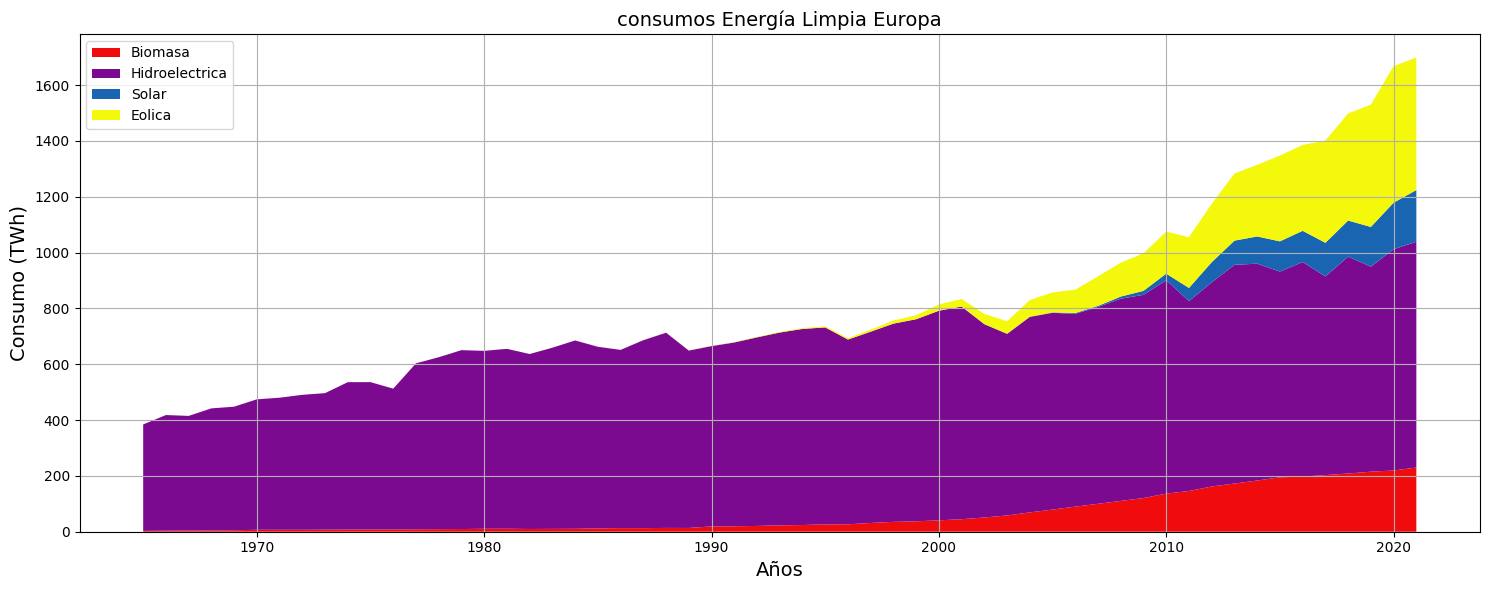

In [34]:
años = Europa1['Year']
energia1 = Europa1['Geo Biomass Other - TWh']
energia2 = Europa1['Hydro Generation - TWh']
energia3 = Europa1['Solar Generation - TWh']
energia4 = Europa1['Wind Generation - TWh']

#Vamos a crear el diagrama de barra apiladas
plt.figure(figsize=(15,6))
plt.stackplot(años,energia1,energia2,energia3,energia4,labels=['Biomasa','Hidroelectrica','Solar','Eolica'],
              colors=["#f00c0c","#7c0a90","#1965b2",'#f4f80b'])


#Añadimos titulos y etiquetas 

plt.title('consumos Energía Limpia Europa',fontsize=14)
plt.xlabel('Años',fontsize=14)
plt.ylabel('Consumo (TWh)',fontsize=14)

#leyenda
plt.legend()

#Mostrar gráfica
plt.grid(True)
plt.tight_layout()
plt.savefig('Areas_Europa')
plt.show()


vamos a ver ahora si encontamos una relación entre dos variables por medio de un grafico de disperción

Correlation coefficient: 0.8825472615226779


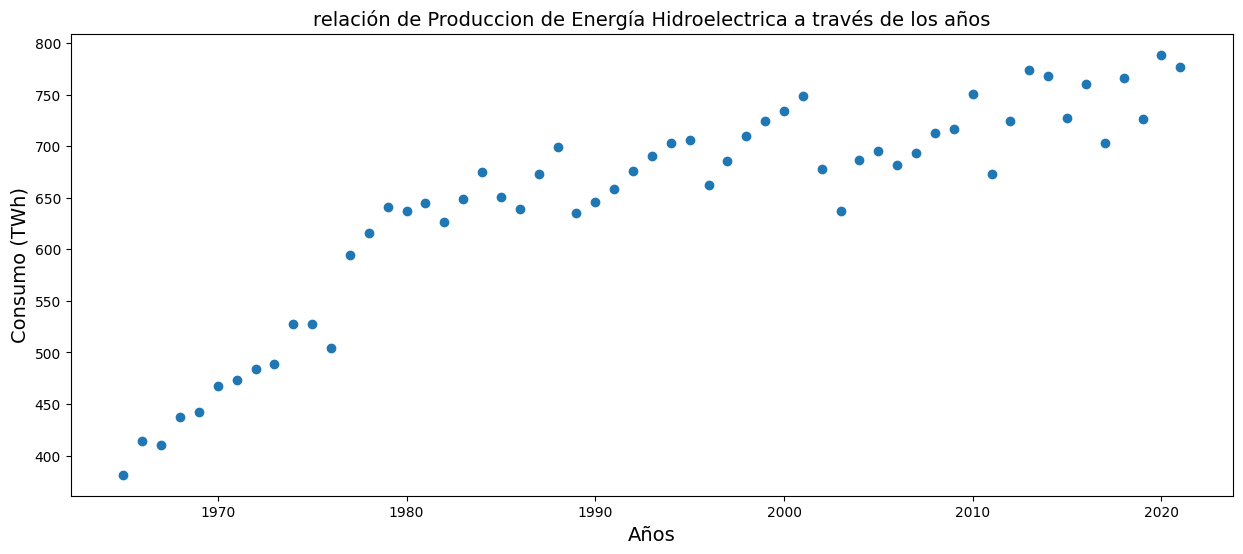

In [36]:
#importamos las librerias con las que vamos a trabajar
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#hacemos la lectura de los datos de las dos bases de datos que dejamos para trabajar. 

#empezamos a trabajar con los datos de las listas
# Estas son las dos variables que vamos a a estudair a ver si encotramos alguna relación

#Produccion de energia limpia en Europa
datos2 = pd.read_csv("produccion_energia_ren.csv")

Europa2= datos2[datos2['Entity']=='Europe']

años = Europa2['Year']
energia5 = Europa2['Electricity from hydro (TWh)']


# Calculamos el coeficioente de correlación

correlation = np.corrcoef(años,energia5)[0, 1]

print(f"Correlation coefficient: {correlation}")

# Plotting the data
plt.figure(figsize=(15,6))
plt.scatter(años,energia5)
plt.title('relación de Produccion de Energía Hidroelectrica a través de los años',fontsize=14)
plt.xlabel('Años',fontsize=14)
plt.ylabel('Consumo (TWh)',fontsize=14)
plt.savefig('correlacion_Europa1')
plt.show()

## **Correlación: Nos dice tanto la dirección como la fuerza de la relación lineal. Un valor cercano a 1 o -1 indica una relación lineal fuerte, mientras que un valor cercano a 0 indica una relación débil o nula**